# Analysing IoT sensors Outliers and their frequency of occurence at Clara and Lullymore sites

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=True

In [3]:
cl_c_1824=pd.read_csv('CO2_1824.csv', sep=';')
cl_c_1825=pd.read_csv('CO2_1825.csv', sep=';')

cl_c_1824.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading
0,2021-01-01 07:08:55,95.943970,-0.748168,-1.25,101252.0,615,600,0,-0.92,3.026,2.974,39844
1,2021-01-01 07:19:04,95.978302,-0.705267,-1.21,101274.0,632,628,0,-0.94,3.026,2.974,39765
2,2021-01-01 14:38:55,82.085175,6.239233,5.70,101334.0,406,406,0,6.08,3.026,2.979,40370
3,2021-01-01 14:48:53,82.142395,6.249958,5.70,101342.0,407,407,0,6.10,3.026,2.979,40368
4,2021-01-01 14:58:56,82.090897,6.300903,5.74,101354.0,407,407,0,6.17,3.026,2.979,40364


In [4]:
cl_c_1824['Timestamp']=pd.to_datetime(cl_c_1824['Timestamp'], infer_datetime_format=True)

In [5]:
cl_c_1824.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26818 entries, 0 to 26817
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Timestamp             26818 non-null  datetime64[ns]
 1   AirHumidity           23059 non-null  float64       
 2   AirTemperature        23059 non-null  float64       
 3   BarometerTemperature  23060 non-null  float64       
 4   BarometricPressure    23060 non-null  float64       
 5   CO2Concentration      26818 non-null  int64         
 6   CO2ConcentrationLPF   26818 non-null  int64         
 7   CO2SensorStatus       26818 non-null  int64         
 8   CO2SensorTemperature  26818 non-null  float64       
 9   CapacitorVoltage1     26818 non-null  float64       
 10  CapacitorVoltage2     26818 non-null  float64       
 11  RawIRreading          26818 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 2.5 MB


Text(0.5, 0, 'CO2 Concentration')

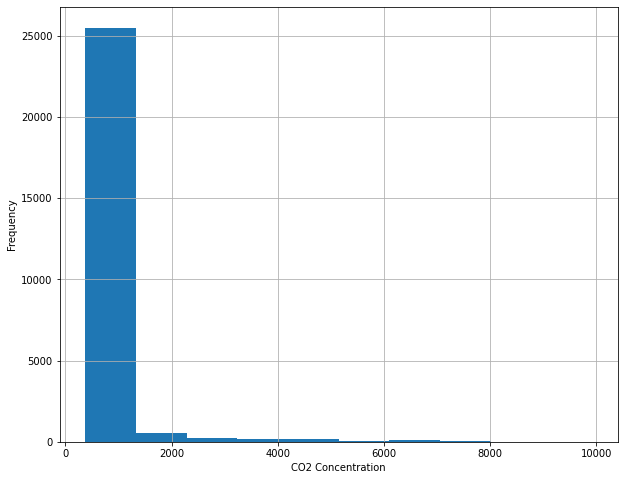

In [6]:
#cl_c_1824.index=cl_c_1824['Timestamp']
#cl_c_1824.drop(['Timestamp'], axis=1, inplace=True)

cl_c_1824['CO2Concentration'].plot(kind='hist')
plt.xlabel('CO2 Concentration')

Text(0.5, 0, 'AirHumidity')

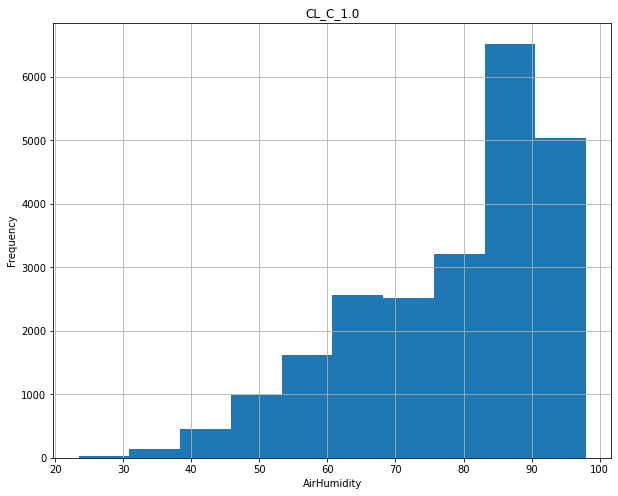

In [7]:
cl_c_1824['AirHumidity'].plot(kind='hist', title='CL_C_1.0')
plt.xlabel('AirHumidity')

Text(0.5, 0, 'AirTemperature')

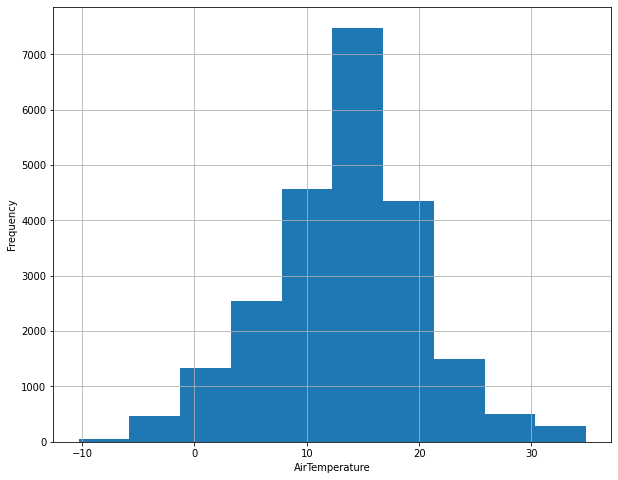

In [8]:
cl_c_1824['AirTemperature'].plot(kind='hist')
plt.xlabel('AirTemperature')

# Feature Engineering

In [9]:
#split into month, day and time
import calendar
cl_c_1824['month']=cl_c_1824['Timestamp'].dt.month
cl_c_1824['month']=cl_c_1824['month'].apply(lambda x:calendar.month_abbr[x])
cl_c_1824['day']=cl_c_1824['Timestamp'].dt.day

cl_c_1824['day_of_week']=cl_c_1824['Timestamp'].dt.dayofweek
cl_c_1824['day_of_week']=cl_c_1824['day_of_week'].apply(lambda x:calendar.day_abbr[x])

cl_c_1824['hour']=cl_c_1824['Timestamp'].dt.hour
cl_c_1824['time_of_day']=cl_c_1824['hour'].apply(lambda x: 'morning' if x<=11 else 'afternoon' if x<=16
                                                else 'evening' if x<=19 else 'night')

In [10]:
cl_c_1824.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,month,day,day_of_week,hour,time_of_day
0,2021-01-01 07:08:55,95.943970,-0.748168,-1.25,101252.0,615,600,0,-0.92,3.026,2.974,39844,Jan,1,Fri,7,morning
1,2021-01-01 07:19:04,95.978302,-0.705267,-1.21,101274.0,632,628,0,-0.94,3.026,2.974,39765,Jan,1,Fri,7,morning
2,2021-01-01 14:38:55,82.085175,6.239233,5.70,101334.0,406,406,0,6.08,3.026,2.979,40370,Jan,1,Fri,14,afternoon
3,2021-01-01 14:48:53,82.142395,6.249958,5.70,101342.0,407,407,0,6.10,3.026,2.979,40368,Jan,1,Fri,14,afternoon
4,2021-01-01 14:58:56,82.090897,6.300903,5.74,101354.0,407,407,0,6.17,3.026,2.979,40364,Jan,1,Fri,14,afternoon


In [11]:
cl_c_1824.describe()

,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,day,hour
count,23059.000000,23059.000000,23060.000000,23060.000000,26818.000000,26818.000000,26818.000000,26818.000000,26818.000000,26818.000000,26818.000000,26818.000000,26818.000000
mean,78.170811,13.415152,12.755507,101063.640243,620.272690,620.090573,0.027444,12.993564,3.025326,2.982667,39140.771198,15.921955,11.520024
std,14.112240,6.743831,6.756421,1009.932761,762.815982,761.735110,0.936747,6.476882,0.004481,0.006048,1751.642216,8.614103,6.970465
min,23.457092,-10.301548,-10.770000,96844.000000,370.000000,371.000000,0.000000,-8.500000,2.890000,2.844000,24170.000000,1.000000,0.000000
25%,68.138641,9.542563,8.880000,100520.000000,411.000000,412.000000,0.000000,9.160000,3.025000,2.981000,39163.000000,9.000000,5.000000
50%,83.118958,13.840646,13.180000,101172.000000,434.000000,434.000000,0.000000,13.400000,3.025000,2.983000,39530.000000,16.000000,12.000000
75%,89.924377,17.465729,16.810000,101738.000000,495.000000,495.000000,0.000000,16.680000,3.026000,2.985000,39805.000000,23.000000,18.000000
max,97.982925,34.853794,34.250000,103528.000000,9925.000000,9920.000000,32.000000,35.130000,3.029000,2.993000,41374.000000,31.000000,23.000000


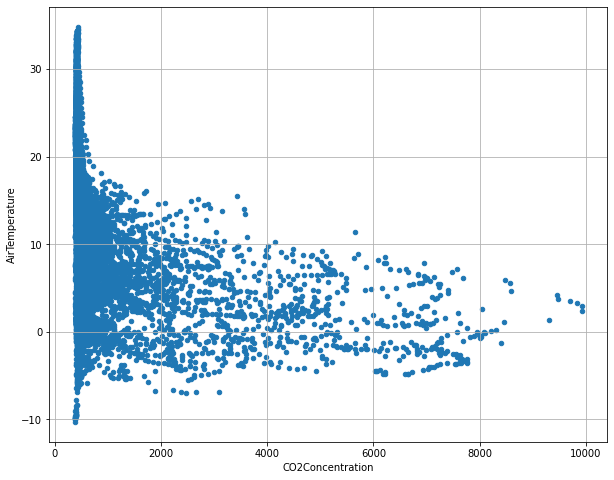

In [12]:
fig1=cl_c_1824.plot('CO2Concentration','AirTemperature', kind='scatter')

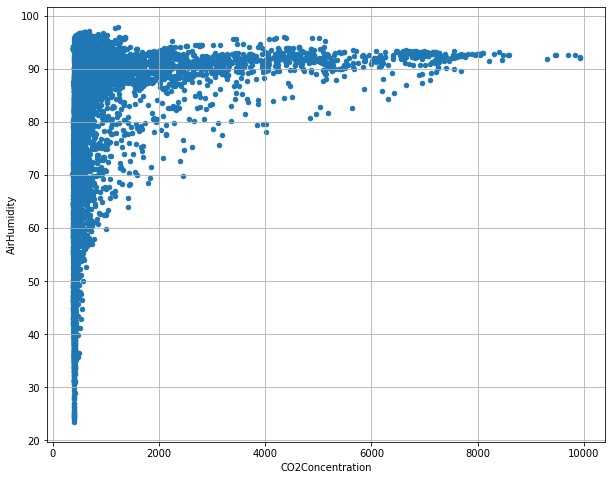

In [13]:
fig1=cl_c_1824.plot('CO2Concentration','AirHumidity', kind='scatter')

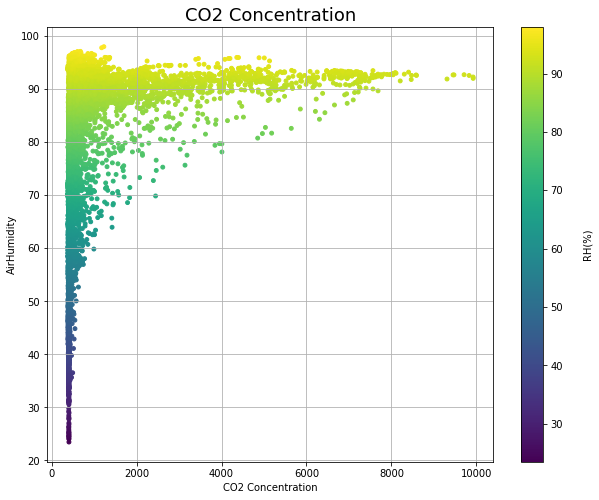

In [375]:
#plot the correlation plot of the sensor and reference data
marker_size=15
plt.scatter(cl_c_1824['CO2Concentration'], cl_c_1824['AirHumidity'], marker_size, c=cl_c_1824['AirHumidity'])
plt.title('CO2 Concentration', size=18)
plt.xlabel('CO2 Concentration')
plt.ylabel('AirHumidity')
cbar=plt.colorbar()
cbar.set_label('RH(%)', labelpad=+20)

<AxesSubplot:xlabel='Timestamp'>

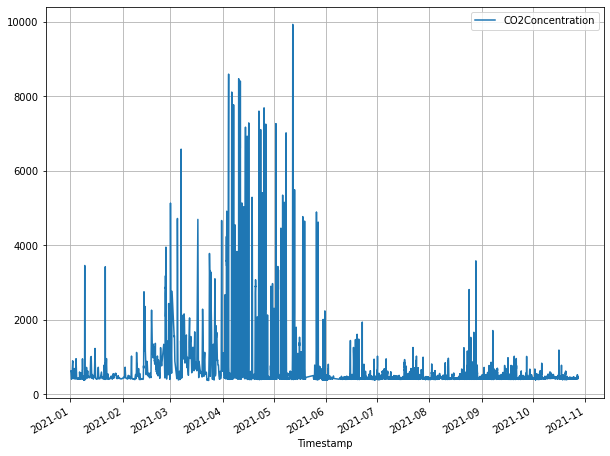

In [289]:
cl_c_1824.plot('Timestamp', 'CO2Concentration', kind='line')

In [290]:
pd.value_counts(cl_c_1824['time_of_day'])

morning      13352
afternoon     5511
night         4553
evening       3402
Name: time_of_day, dtype: int64

In [291]:
data=cl_c_1824[[ 'time_of_day','CO2Concentration']]
#data['time_of_day'].replace(['morning', 'afternoon', 'evening', 'night'],[1,2,3,4], inplace=True)
data.head()

,time_of_day,CO2Concentration
0,morning,615
1,morning,632
2,afternoon,406
3,afternoon,407
4,afternoon,407


(300.0, 12000.0)

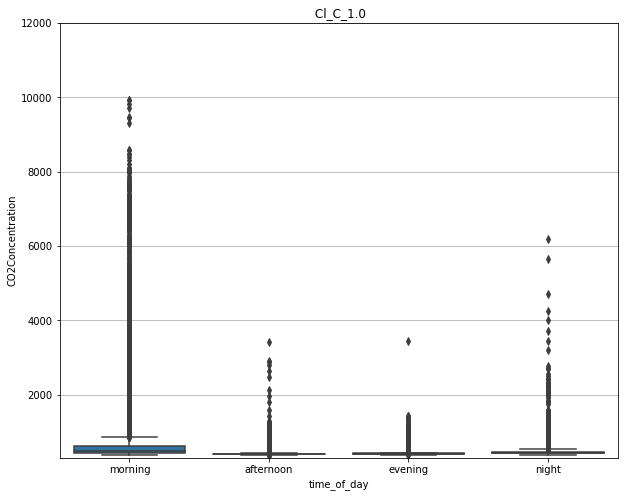

In [292]:
#sns.boxplot(cl_c_1824[['hour', 'CO2Concentration']])
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.5)
ax = sns.boxplot(x="time_of_day", y="CO2Concentration", data=cl_c_1824)
ax.set_title(' Cl_C_1.0')
ax.set_ylim(300,12000)


(300.0, 5000.0)

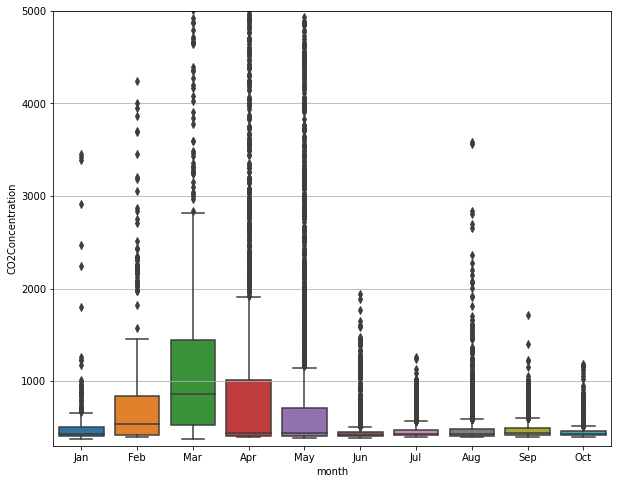

In [293]:
ax = sns.boxplot(x="month", y="CO2Concentration", data=cl_c_1824)
ax.set_ylim(300,5000)


In [294]:
#select cells where CO2 concentration is greater than 1000
new_df=cl_c_1824[cl_c_1824.CO2Concentration <=1000]

In [295]:
new_df.shape


(25054, 17)

In [296]:
new_df['time_of_day'].value_counts()

morning      11713
afternoon     5486
night         4473
evening       3382
Name: time_of_day, dtype: int64

In [297]:
new_df=new_df.dropna()
new_df.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,month,day,day_of_week,hour,time_of_day
0,2021-01-01 07:08:55,95.943970,-0.748168,-1.25,101252.0,615,600,0,-0.92,3.026,2.974,39844,Jan,1,Fri,7,morning
1,2021-01-01 07:19:04,95.978302,-0.705267,-1.21,101274.0,632,628,0,-0.94,3.026,2.974,39765,Jan,1,Fri,7,morning
2,2021-01-01 14:38:55,82.085175,6.239233,5.70,101334.0,406,406,0,6.08,3.026,2.979,40370,Jan,1,Fri,14,afternoon
3,2021-01-01 14:48:53,82.142395,6.249958,5.70,101342.0,407,407,0,6.10,3.026,2.979,40368,Jan,1,Fri,14,afternoon
4,2021-01-01 14:58:56,82.090897,6.300903,5.74,101354.0,407,407,0,6.17,3.026,2.979,40364,Jan,1,Fri,14,afternoon


# Trend and Seasonality Checks

In [298]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21304 entries, 0 to 23059
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Timestamp             21304 non-null  datetime64[ns]
 1   AirHumidity           21304 non-null  float64       
 2   AirTemperature        21304 non-null  float64       
 3   BarometerTemperature  21304 non-null  float64       
 4   BarometricPressure    21304 non-null  float64       
 5   CO2Concentration      21304 non-null  int64         
 6   CO2ConcentrationLPF   21304 non-null  int64         
 7   CO2SensorStatus       21304 non-null  int64         
 8   CO2SensorTemperature  21304 non-null  float64       
 9   CapacitorVoltage1     21304 non-null  float64       
 10  CapacitorVoltage2     21304 non-null  float64       
 11  RawIRreading          21304 non-null  int64         
 12  month                 21304 non-null  object        
 13  day             

In [299]:
from statsmodels.tsa.seasonal import seasonal_decompose
#series=new_df['CO2Concentration'].squeeze()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


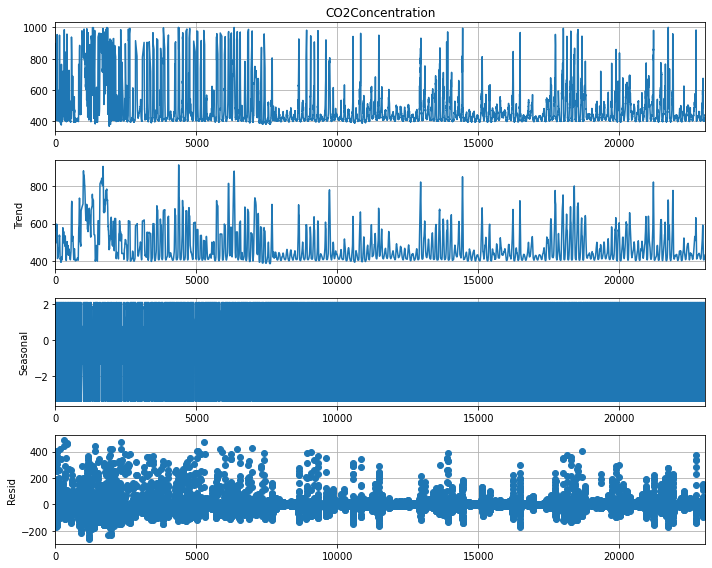

In [300]:
result=seasonal_decompose(new_df['CO2Concentration'], model='additive', freq=24)
result.plot()
plt.show()

# cl_c_1825 (installed 0.5 meter above ground level on Clara Central ecotope)

In [301]:
cl_c_1825.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF
0,2021-01-08 17:18:52,91.808838,-2.587522,-2.84,102208,NaN,420,421,0,-2.85,3.016,2.964,42138,42085
1,2021-01-08 17:38:56,92.230362,-3.904028,-4.14,102210,NaN,425,423,0,-4.15,3.017,2.962,42242,42191
2,2021-01-08 17:58:53,93.164963,-4.920231,-5.16,102232,NaN,431,429,0,-5.21,3.017,2.961,42315,42283
3,2021-01-08 18:18:48,94.278854,-5.622725,-5.87,102228,NaN,434,431,0,-5.94,3.017,2.961,42367,42363
4,2021-01-08 18:38:52,94.963593,-6.201880,-6.45,102216,NaN,436,435,0,-6.52,3.017,2.960,42412,42384


In [302]:
cl_c_1825['Timestamp']=pd.to_datetime(cl_c_1825.Timestamp, infer_datetime_format=True)

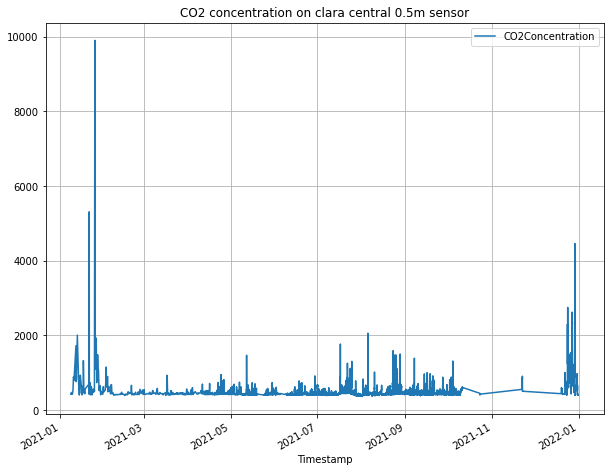

In [303]:
cl_c_1825.plot('Timestamp', 'CO2Concentration', kind='line', title='CO2 concentration on clara central 0.5m sensor')
plt.show()


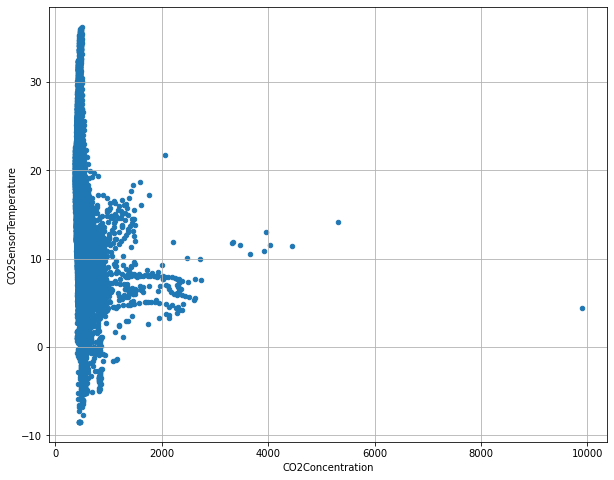

In [304]:
fig1=cl_c_1825.plot(x='CO2Concentration',y='CO2SensorTemperature', kind='scatter')

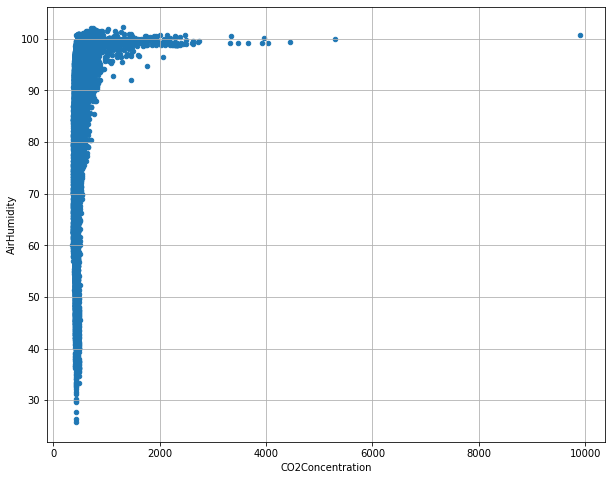

In [305]:
fig1=cl_c_1825.plot(x='CO2Concentration',y='AirHumidity', kind='scatter')

Text(0.5, 0, 'AirHumidity')

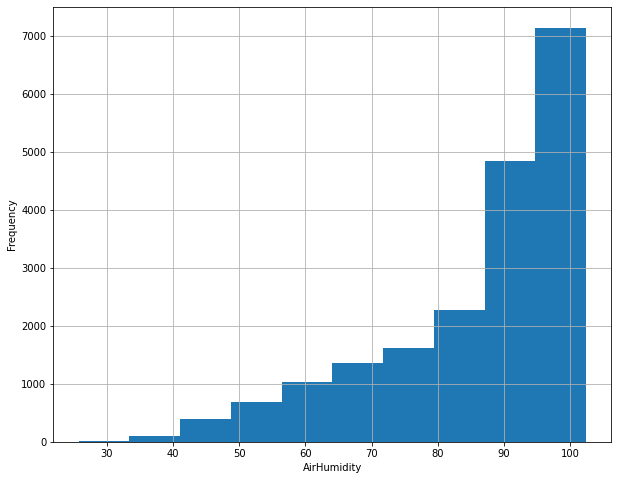

In [306]:
cl_c_1825['AirHumidity'].plot(kind='hist')
plt.xlabel('AirHumidity')

In [307]:
#split into month, day and time
cl_c_1825['month']=cl_c_1825['Timestamp'].dt.month
cl_c_1825['month']=cl_c_1825['month'].apply(lambda x:calendar.month_abbr[x])
cl_c_1825['day']=cl_c_1825['Timestamp'].dt.day

cl_c_1825['day_of_week']=cl_c_1825['Timestamp'].dt.dayofweek
cl_c_1825['day_of_week']=cl_c_1825['day_of_week'].apply(lambda x:calendar.day_abbr[x])

cl_c_1825['hour']=cl_c_1825['Timestamp'].dt.hour
cl_c_1825['time_of_day']=cl_c_1825['hour'].apply(lambda x: 'morning' if x<=11 else 'afternoon' if x<=15
                                                else 'evening' if x<=19 else 'night')

In [308]:
cl_c_1825.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF,month,day,day_of_week,hour,time_of_day
0,2021-01-08 17:18:52,91.808838,-2.587522,-2.84,102208,NaN,420,421,0,-2.85,3.016,2.964,42138,42085,Jan,8,Fri,17,evening
1,2021-01-08 17:38:56,92.230362,-3.904028,-4.14,102210,NaN,425,423,0,-4.15,3.017,2.962,42242,42191,Jan,8,Fri,17,evening
2,2021-01-08 17:58:53,93.164963,-4.920231,-5.16,102232,NaN,431,429,0,-5.21,3.017,2.961,42315,42283,Jan,8,Fri,17,evening
3,2021-01-08 18:18:48,94.278854,-5.622725,-5.87,102228,NaN,434,431,0,-5.94,3.017,2.961,42367,42363,Jan,8,Fri,18,evening
4,2021-01-08 18:38:52,94.963593,-6.201880,-6.45,102216,NaN,436,435,0,-6.52,3.017,2.960,42412,42384,Jan,8,Fri,18,evening


In [309]:
pd.value_counts(cl_c_1825['time_of_day'])

morning      9744
night        3336
afternoon    3232
evening      3159
Name: time_of_day, dtype: int64

(300.0, 1000.0)

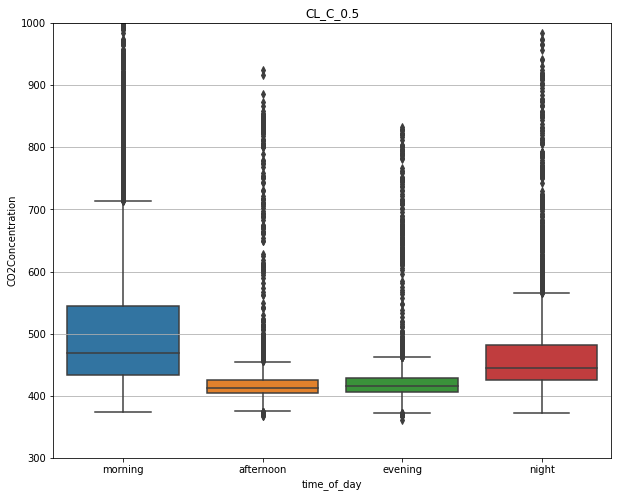

In [310]:
ax = sns.boxplot(x="time_of_day", y="CO2Concentration", data=cl_c_1825, order=['morning', 'afternoon', 'evening','night'])
ax.set_title('CL_C_0.5')
ax.set_ylim(300,1000)


(300.0, 2000.0)

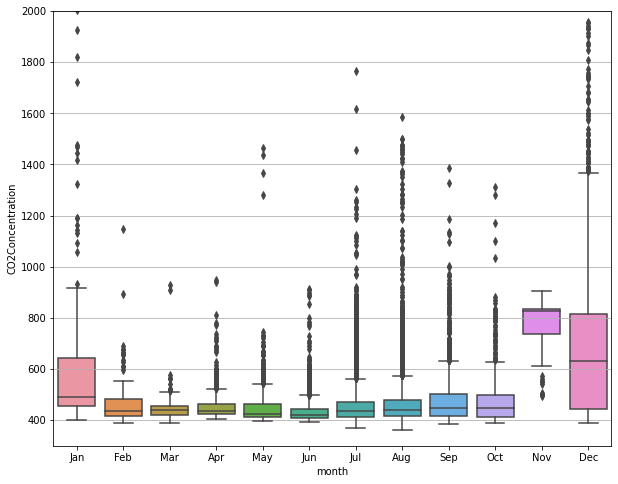

In [311]:
ax = sns.boxplot(x="month", y="CO2Concentration", data=cl_c_1825)
ax.set_ylim(300,2000)

In [312]:
df2=cl_c_1825[cl_c_1825.CO2Concentration >=1000]

In [313]:
df2['time_of_day'].value_counts()

morning      219
afternoon     28
night         11
evening        2
Name: time_of_day, dtype: int64

# EC FLUX

In [314]:
ec_flux=pd.read_excel('Clara_EC_Flux.xlsx')
ec_flux.drop('DOY', axis=1, inplace=True)

In [315]:

ec_flux['Timestamp']=pd.to_datetime(ec_flux.Timestamp, infer_datetime_format=True)
ec_flux.tail()

,Timestamp,CO2Concentration
17514,2021-12-31 21:30:00,390.424
17515,2021-12-31 22:00:00,404.006
17516,2021-12-31 22:30:00,405.254
17517,2021-12-31 23:00:00,405.439
17518,2021-12-31 23:30:00,405.078


In [316]:
len(ec_flux)

17519

In [317]:
ec_flux['month']=ec_flux['Timestamp'].dt.month
ec_flux['month']=ec_flux['month'].apply(lambda x:calendar.month_abbr[x])
ec_flux['day']=ec_flux['Timestamp'].dt.day

ec_flux['day_of_week']=ec_flux['Timestamp'].dt.dayofweek
ec_flux['day_of_week']=ec_flux['day_of_week'].apply(lambda x:calendar.day_abbr[x])

ec_flux['hour']=ec_flux['Timestamp'].dt.hour
ec_flux['time_of_day']=ec_flux['hour'].apply(lambda x: 'morning' if x<=11 else 'afternoon' if x<=15
                                                else 'evening' if x<=19 else 'night')

In [318]:
ec_flux.head()

,Timestamp,CO2Concentration,month,day,day_of_week,hour,time_of_day
0,2021-01-01 00:30:00,404.233,Jan,1,Fri,0,morning
1,2021-01-01 01:00:00,404.480,Jan,1,Fri,1,morning
2,2021-01-01 01:30:00,405.039,Jan,1,Fri,1,morning
3,2021-01-01 02:00:00,404.871,Jan,1,Fri,2,morning
4,2021-01-01 02:30:00,404.892,Jan,1,Fri,2,morning


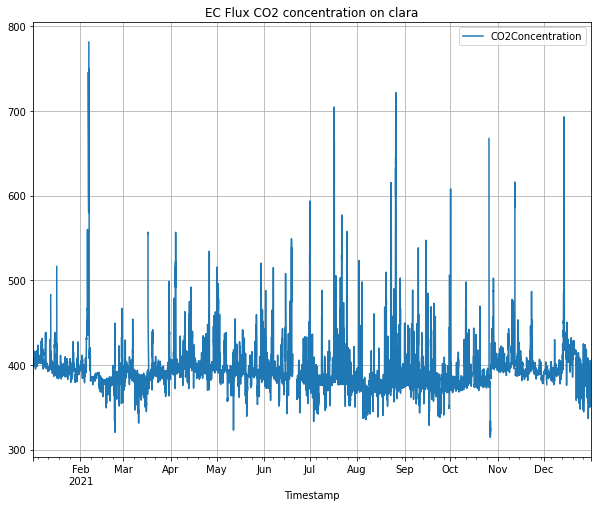

In [319]:
ec_flux.plot('Timestamp', 'CO2Concentration', kind='line', title='EC Flux CO2 concentration on clara')
plt.show()


Text(0.5, 1.0, 'EC_Flux')

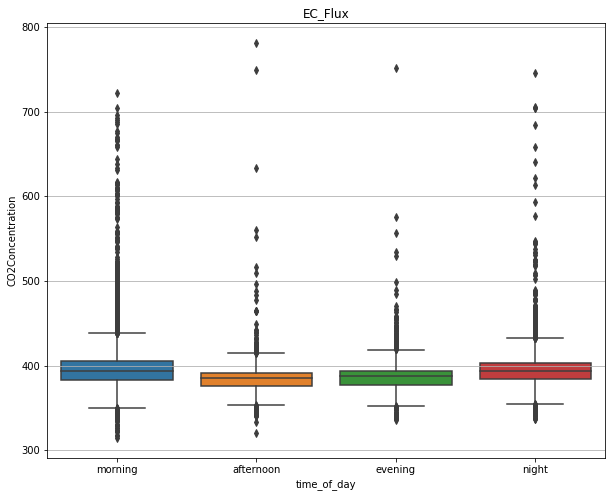

In [320]:
ax=sns.boxplot(x='time_of_day', y='CO2Concentration', data=ec_flux)
ax.set_title('EC_Flux')

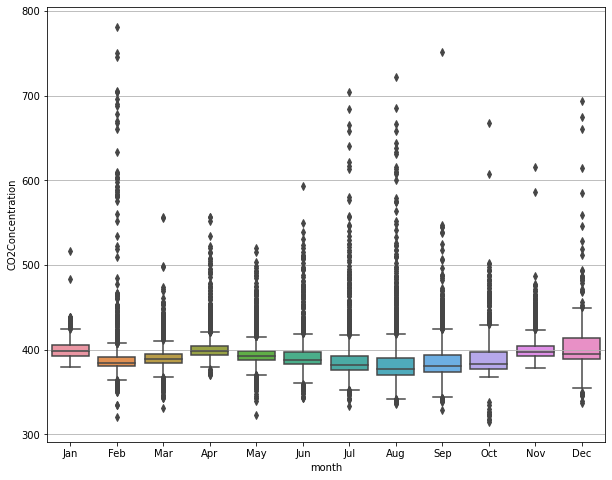

In [321]:
ax = sns.boxplot(x="month", y="CO2Concentration", data=ec_flux)

#ax.set_ylim(300,2000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


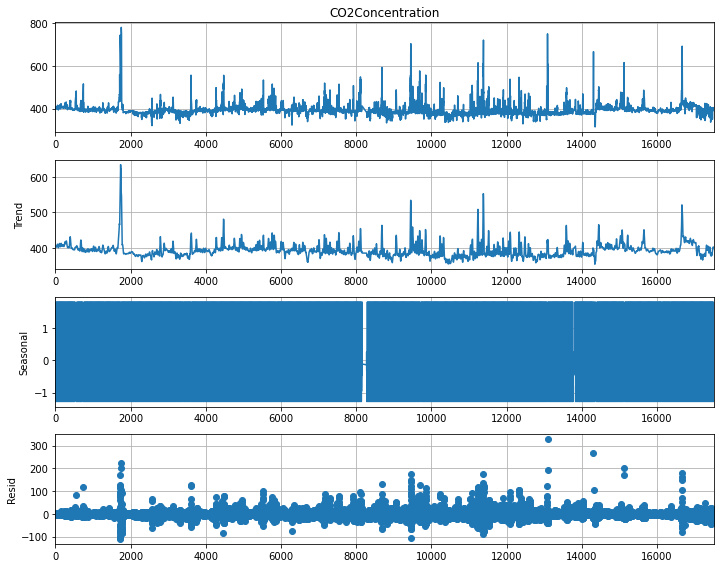

In [322]:
ec_flux.dropna(inplace=True)
result=seasonal_decompose(ec_flux['CO2Concentration'], model='additive', freq=24)
result.plot()
plt.show()

# 1826 (0.5 meters above ground level installed on EC at Clara)

In [323]:
cl_ec_1826=pd.read_csv('CO2_1826.csv', sep=';')

In [324]:
cl_ec_1826['Timestamp']=pd.to_datetime(cl_ec_1826.Timestamp, infer_datetime_format=True)
cl_ec_1826.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF
0,2021-01-08 18:13:44,90.462250,-5.657581,-6.25,102180,NaN,673,678,0,-5.74,3.026,2.968,39361,39328
1,2021-01-08 20:14:03,96.054596,-7.456716,-8.09,102228,NaN,1450,1433,0,-7.55,3.024,2.964,36518,36571
2,2021-01-09 03:33:42,96.684021,-10.331042,-11.05,102312,NaN,1434,1434,32,-8.50,3.025,2.961,36610,36610
3,2021-01-09 03:43:46,96.939606,-10.180891,-10.90,102306,NaN,1469,1469,32,-8.50,3.025,2.961,36505,36505
4,2021-01-09 03:53:48,97.218079,-9.987839,-10.70,102304,NaN,1522,1522,32,-8.50,3.025,2.962,36346,36346


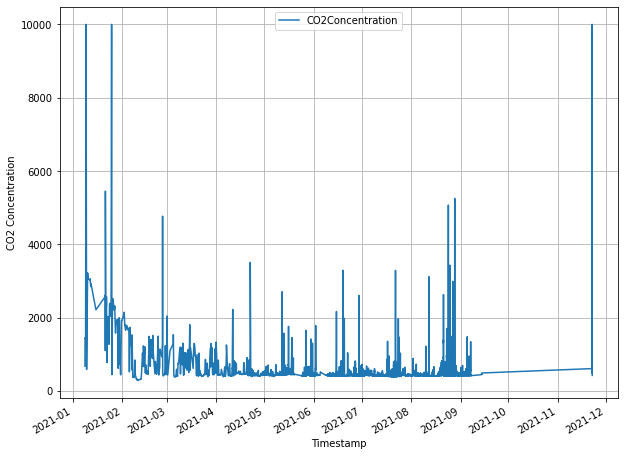

In [373]:
cl_ec_1826.plot(x='Timestamp',y='CO2Concentration', kind='line')
plt.ylabel('CO2 Concentration')
plt.show()

In [326]:
cl_ec_1826['month']=cl_ec_1826['Timestamp'].dt.month
cl_ec_1826['month']=cl_ec_1826['month'].apply(lambda x:calendar.month_abbr[x])
cl_ec_1826['day']=cl_ec_1826['Timestamp'].dt.day

cl_ec_1826['day_of_week']=cl_ec_1826['Timestamp'].dt.dayofweek
cl_ec_1826['day_of_week']=cl_ec_1826['day_of_week'].apply(lambda x:calendar.day_abbr[x])

cl_ec_1826['hour']=cl_ec_1826['Timestamp'].dt.hour
cl_ec_1826['time_of_day']=cl_ec_1826['hour'].apply(lambda x: 'morning' if x<=11 else 'afternoon' if x<=15
                                                else 'evening' if x<=19 else 'night')
cl_ec_1826.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF,month,day,day_of_week,hour,time_of_day
0,2021-01-08 18:13:44,90.462250,-5.657581,-6.25,102180,NaN,673,678,0,-5.74,3.026,2.968,39361,39328,Jan,8,Fri,18,evening
1,2021-01-08 20:14:03,96.054596,-7.456716,-8.09,102228,NaN,1450,1433,0,-7.55,3.024,2.964,36518,36571,Jan,8,Fri,20,night
2,2021-01-09 03:33:42,96.684021,-10.331042,-11.05,102312,NaN,1434,1434,32,-8.50,3.025,2.961,36610,36610,Jan,9,Sat,3,morning
3,2021-01-09 03:43:46,96.939606,-10.180891,-10.90,102306,NaN,1469,1469,32,-8.50,3.025,2.961,36505,36505,Jan,9,Sat,3,morning
4,2021-01-09 03:53:48,97.218079,-9.987839,-10.70,102304,NaN,1522,1522,32,-8.50,3.025,2.962,36346,36346,Jan,9,Sat,3,morning


<AxesSubplot:title={'center':'Number of data points recorded'}>

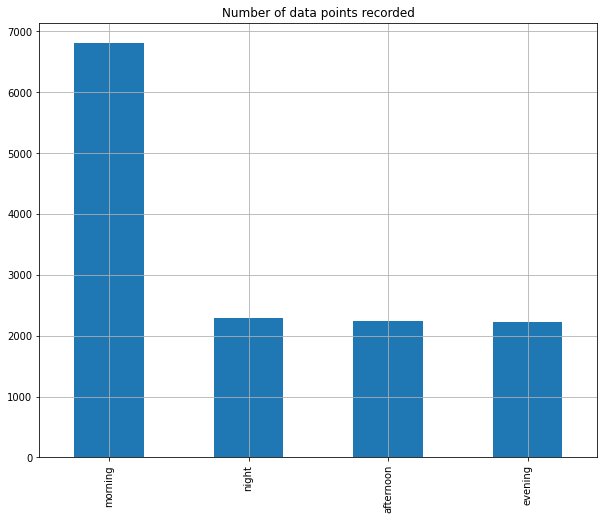

In [327]:
cl_ec_1826['time_of_day'].value_counts().plot(kind='bar', 
                                             title='Number of data points recorded')

(200.0, 1000.0)

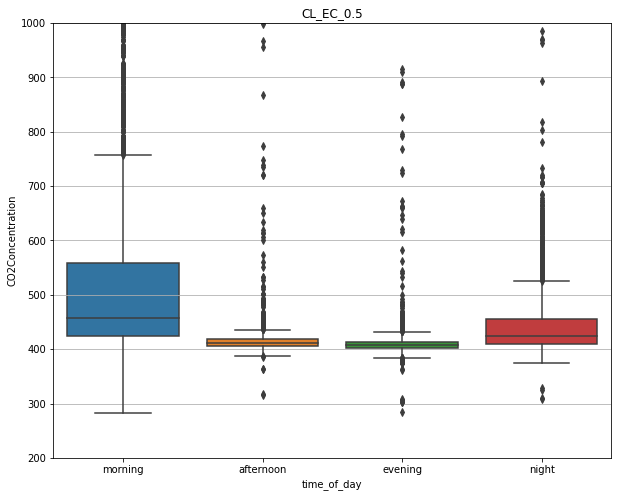

In [328]:
ax=sns.boxplot(x='time_of_day', y='CO2Concentration', data=cl_ec_1826,order=['morning', 'afternoon', 'evening','night'])
ax.set_title('CL_EC_0.5')
ax.set_ylim(200,1000)

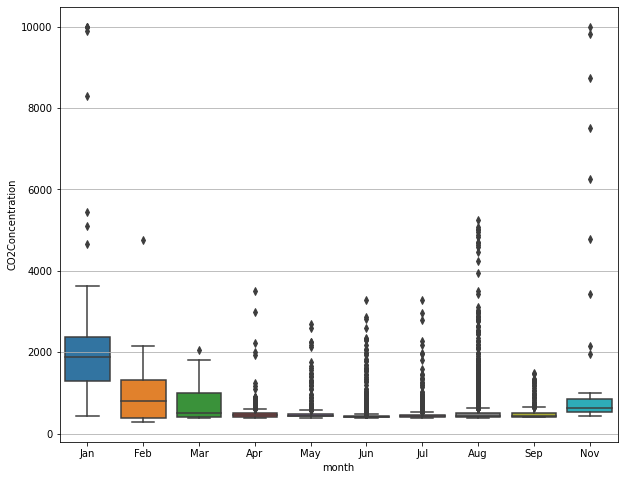

In [329]:
ax=sns.boxplot(x='month', y='CO2Concentration', data=cl_ec_1826)


In [330]:
df2=cl_ec_1826[cl_ec_1826.CO2Concentration >=1000]

In [331]:
df2['time_of_day'].value_counts()

morning      445
night         32
afternoon     29
evening       16
Name: time_of_day, dtype: int64

<AxesSubplot:xlabel='CO2Concentration', ylabel='CO2SensorTemperature'>

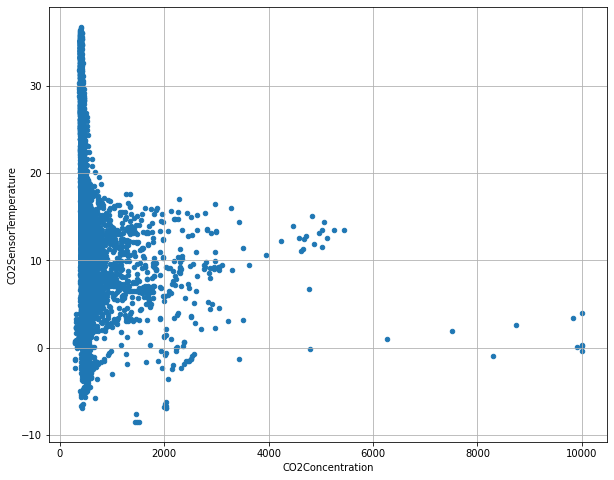

In [332]:
cl_ec_1826.plot(y='CO2SensorTemperature', x='CO2Concentration', kind='scatter')

<AxesSubplot:xlabel='CO2Concentration', ylabel='AirHumidity'>

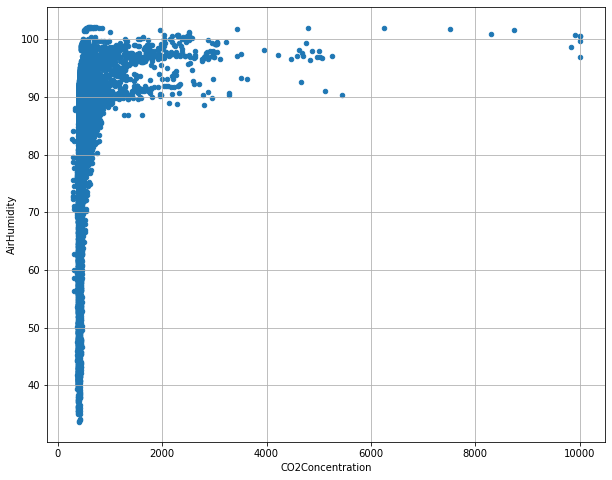

In [333]:
cl_ec_1826.plot(x='CO2Concentration',y='AirHumidity',  kind='scatter')

Text(0.5, 0, 'AirHumidity')

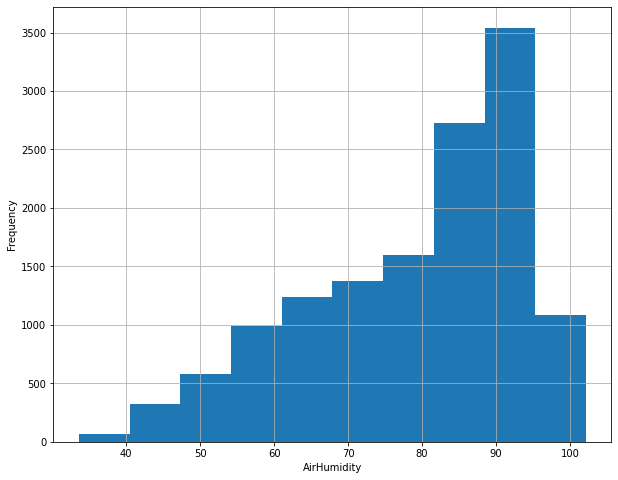

In [334]:
cl_ec_1826['AirHumidity'].plot(kind='hist')
plt.xlabel('AirHumidity')

# 1827 (1 meters above ground level installed on EC at Clara)

In [335]:
cl_ec_1827=pd.read_csv('CO2_1827.csv', sep=';')

In [336]:
cl_ec_1827['Timestamp']=pd.to_datetime(cl_ec_1827.Timestamp, infer_datetime_format=True)
cl_ec_1827.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF
0,2021-01-08 19:33:04,93.151611,-6.282318,-6.34,102208,NaN,373,379,0,-6.35,3.017,2.959,39496,39466
1,2021-01-08 19:43:14,93.248886,-6.523633,-6.59,102212,NaN,376,371,0,-6.68,3.017,2.959,39477,39504
2,2021-01-08 20:33:15,94.219727,-6.234055,-6.31,102244,NaN,430,424,0,-6.32,3.017,2.959,39225,39250
3,2021-01-08 21:33:05,94.784302,-6.335944,-6.39,102296,NaN,433,437,0,-6.34,3.017,2.959,39212,39192
4,2021-01-08 22:13:04,94.276947,-7.411135,-7.46,102320,NaN,396,402,0,-7.46,3.017,2.958,39374,39348


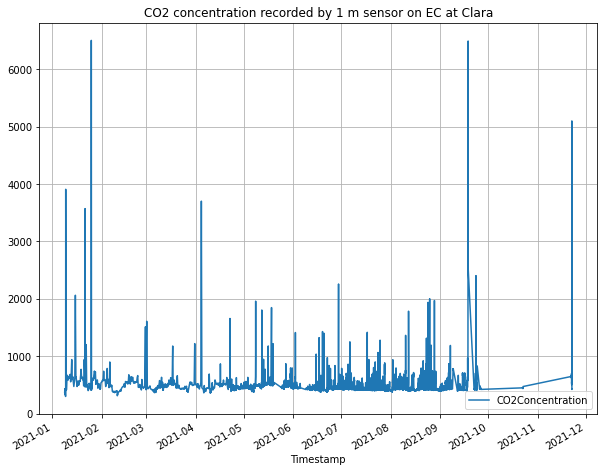

In [337]:
cl_ec_1827.plot(x='Timestamp',y='CO2Concentration', kind='line', title='CO2 concentration recorded by 1 m sensor on EC at Clara')

plt.show()

In [338]:
cl_ec_1827['month']=cl_ec_1827['Timestamp'].dt.month
cl_ec_1827['month']=cl_ec_1827['month'].apply(lambda x:calendar.month_abbr[x])
cl_ec_1827['day']=cl_ec_1827['Timestamp'].dt.day

cl_ec_1827['day_of_week']=cl_ec_1827['Timestamp'].dt.dayofweek
cl_ec_1827['day_of_week']=cl_ec_1827['day_of_week'].apply(lambda x:calendar.day_abbr[x])

cl_ec_1827['hour']=cl_ec_1827['Timestamp'].dt.hour
cl_ec_1827['time_of_day']=cl_ec_1827['hour'].apply(lambda x: 'morning' if x<=11 else 'afternoon' if x<=15
                                                else 'evening' if x<=19 else 'night')
cl_ec_1827.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF,month,day,day_of_week,hour,time_of_day
0,2021-01-08 19:33:04,93.151611,-6.282318,-6.34,102208,NaN,373,379,0,-6.35,3.017,2.959,39496,39466,Jan,8,Fri,19,evening
1,2021-01-08 19:43:14,93.248886,-6.523633,-6.59,102212,NaN,376,371,0,-6.68,3.017,2.959,39477,39504,Jan,8,Fri,19,evening
2,2021-01-08 20:33:15,94.219727,-6.234055,-6.31,102244,NaN,430,424,0,-6.32,3.017,2.959,39225,39250,Jan,8,Fri,20,night
3,2021-01-08 21:33:05,94.784302,-6.335944,-6.39,102296,NaN,433,437,0,-6.34,3.017,2.959,39212,39192,Jan,8,Fri,21,night
4,2021-01-08 22:13:04,94.276947,-7.411135,-7.46,102320,NaN,396,402,0,-7.46,3.017,2.958,39374,39348,Jan,8,Fri,22,night


(300.0, 1000.0)

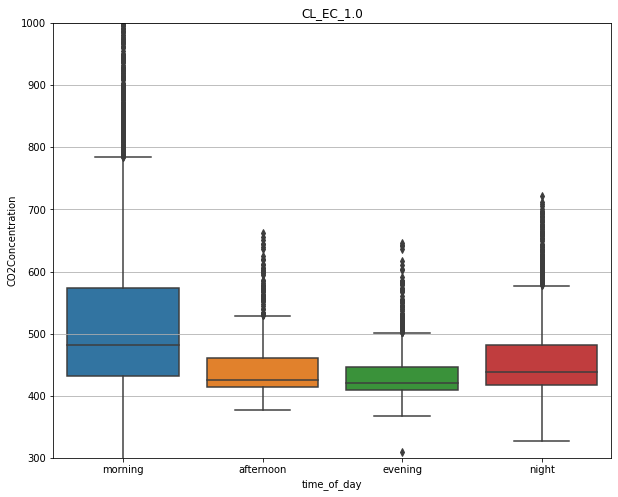

In [339]:
ax=sns.boxplot(x='time_of_day', y='CO2Concentration', data=cl_ec_1827, order=['morning', 'afternoon', 'evening','night'])
ax.set_title('CL_EC_1.0')
ax.set_ylim(300,1000)

(200.0, 1000.0)

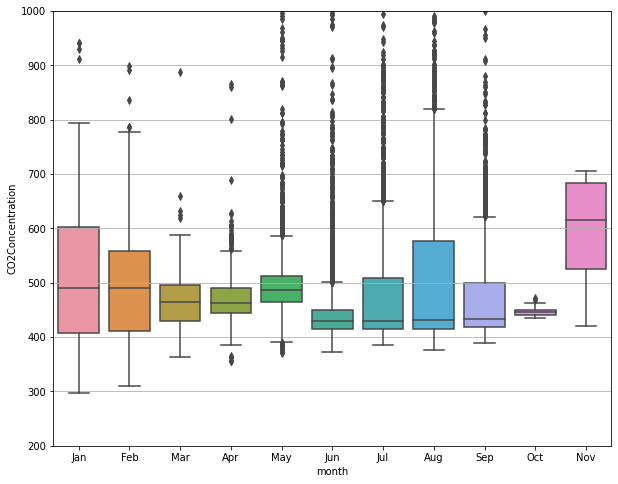

In [340]:
ax=sns.boxplot(x='month', y='CO2Concentration', data=cl_ec_1827)
ax.set_ylim(200,1000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


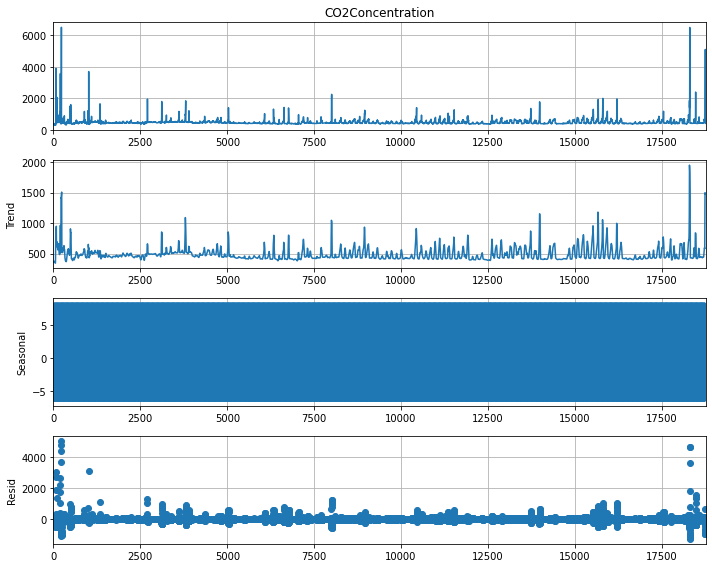

In [341]:
result=seasonal_decompose(cl_ec_1827['CO2Concentration'], model='additive', freq=24)
result.plot()
plt.show()

In [342]:
df2=cl_ec_1827[cl_ec_1827.CO2Concentration >=1000]
df2.shape

(199, 19)

In [343]:
df2['time_of_day'].value_counts()

morning      193
afternoon      6
Name: time_of_day, dtype: int64

Text(0.5, 0, 'AirHumidity')

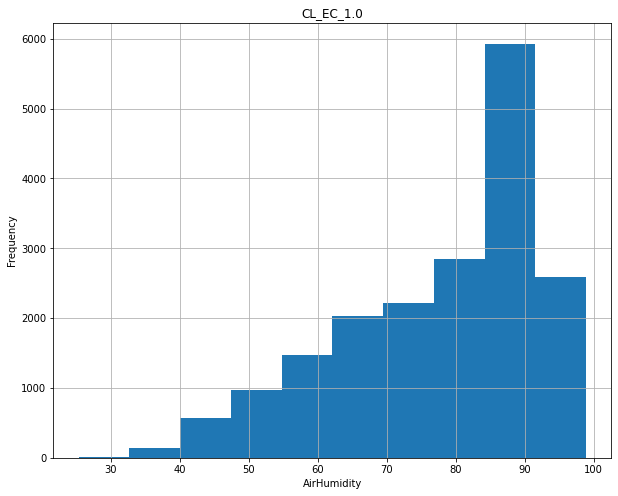

In [344]:
cl_ec_1827['AirHumidity'].plot(kind='hist', title='CL_EC_1.0')
plt.xlabel('AirHumidity')

# 1467 Marginal 1 m above ground level on clara

In [345]:
cl_m_1467=pd.read_csv('CO2_1467.csv',sep=';')

In [346]:
cl_m_1467['Timestamp']=pd.to_datetime(cl_m_1467.Timestamp, infer_datetime_format=True)
cl_m_1467.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF
0,2021-01-01 06:52:38,101.818604,-1.472112,-1.52,100914,2.73,574,552,0,-1.75,3.028,2.978,41208,41313
1,2021-01-01 07:02:18,102.612061,-1.035064,-1.10,100924,2.729,739,691,0,-1.25,3.028,2.978,40438,40656
2,2021-01-01 23:32:33,101.311249,-3.268566,-3.35,101408,2.731,584,583,0,-3.67,3.028,2.977,41229,41229
3,2021-01-01 23:42:15,101.425690,-3.091602,-3.17,101412,2.731,645,627,0,-3.43,3.028,2.977,40929,41019
4,2021-01-02 21:12:17,102.005524,-1.016295,-1.08,101624,2.731,840,856,0,-1.32,3.028,2.979,40012,39945


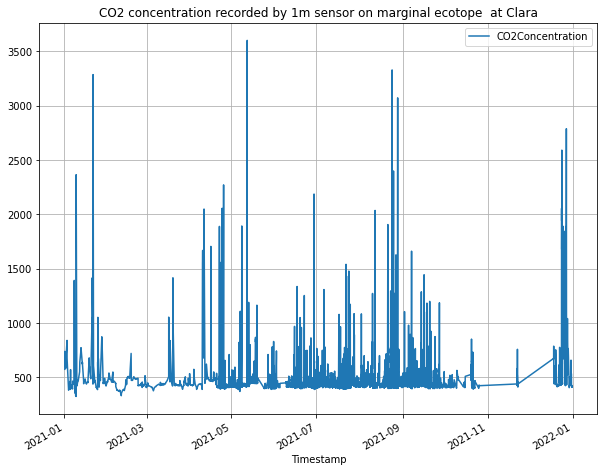

In [347]:
cl_m_1467.plot(x='Timestamp',y='CO2Concentration', kind='line', title='CO2 concentration recorded by 1m sensor on marginal ecotope  at Clara')

plt.show()

In [348]:
cl_m_1467['month']=cl_m_1467['Timestamp'].dt.month
cl_m_1467['month']=cl_m_1467['month'].apply(lambda x:calendar.month_abbr[x])
cl_m_1467['day']=cl_m_1467['Timestamp'].dt.day

cl_m_1467['day_of_week']=cl_m_1467['Timestamp'].dt.dayofweek
cl_m_1467['day_of_week']=cl_m_1467['day_of_week'].apply(lambda x:calendar.day_abbr[x])

cl_m_1467['hour']=cl_m_1467['Timestamp'].dt.hour
cl_m_1467['time_of_day']=cl_m_1467['hour'].apply(lambda x: 'morning' if x<=11 else 'afternoon' if x<=15
                                                else 'evening' if x<=19 else 'night')
cl_m_1467.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF,month,day,day_of_week,hour,time_of_day
0,2021-01-01 06:52:38,101.818604,-1.472112,-1.52,100914,2.73,574,552,0,-1.75,3.028,2.978,41208,41313,Jan,1,Fri,6,morning
1,2021-01-01 07:02:18,102.612061,-1.035064,-1.10,100924,2.729,739,691,0,-1.25,3.028,2.978,40438,40656,Jan,1,Fri,7,morning
2,2021-01-01 23:32:33,101.311249,-3.268566,-3.35,101408,2.731,584,583,0,-3.67,3.028,2.977,41229,41229,Jan,1,Fri,23,night
3,2021-01-01 23:42:15,101.425690,-3.091602,-3.17,101412,2.731,645,627,0,-3.43,3.028,2.977,40929,41019,Jan,1,Fri,23,night
4,2021-01-02 21:12:17,102.005524,-1.016295,-1.08,101624,2.731,840,856,0,-1.32,3.028,2.979,40012,39945,Jan,2,Sat,21,night


(300.0, 1000.0)

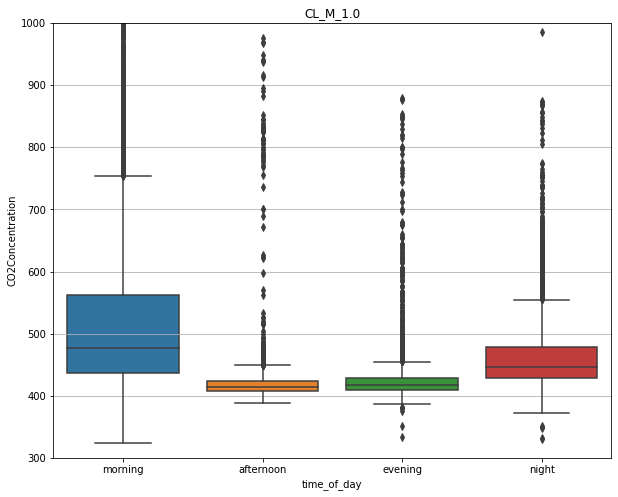

In [349]:
ax=sns.boxplot(x='time_of_day', y='CO2Concentration', data=cl_m_1467,order=['morning', 'afternoon', 'evening','night'])
ax.set_title('CL_M_1.0')
ax.set_ylim(300,1000)

(300.0, 1000.0)

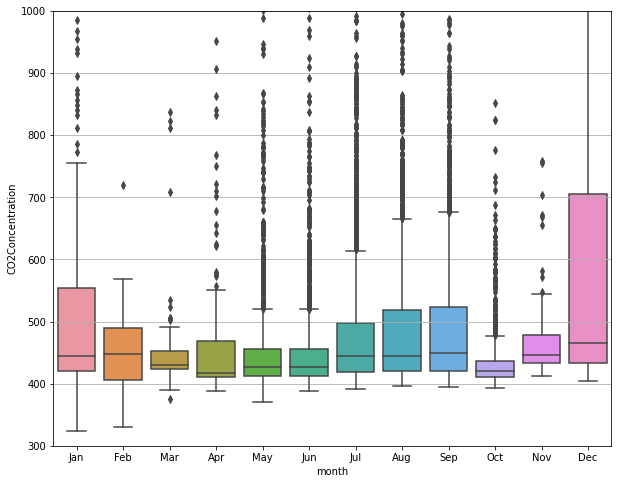

In [350]:
ax=sns.boxplot(x='month', y='CO2Concentration', data=cl_m_1467)
ax.set_ylim(300,1000)

<AxesSubplot:>

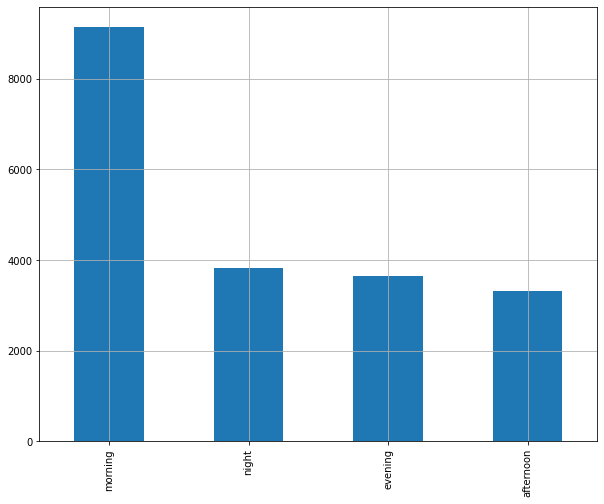

In [351]:
cl_m_1467['time_of_day'].value_counts().plot(kind='bar')

In [352]:
df2=cl_m_1467[cl_m_1467.CO2Concentration >=1000]
df2.shape


(404, 19)

In [353]:
df2['time_of_day'].value_counts()

morning      374
afternoon     19
night         11
Name: time_of_day, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


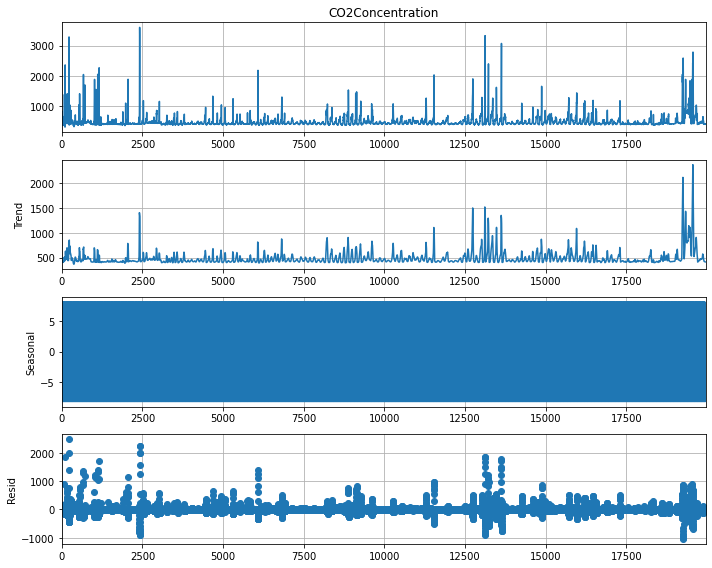

In [354]:
result=seasonal_decompose(cl_m_1467['CO2Concentration'], model='additive', freq=24)
result.plot()
plt.show()

Text(0.5, 0, 'AirHumidity')

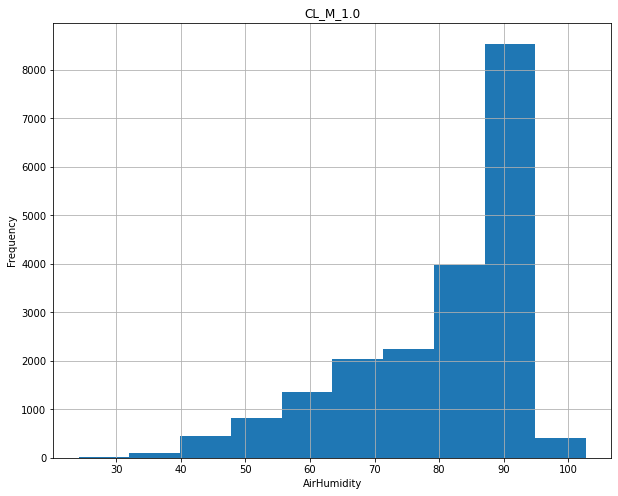

In [355]:
cl_m_1467['AirHumidity'].plot(kind='hist', title='CL_M_1.0')
plt.xlabel('AirHumidity')

# Analysis of sensors data on Lullymore Peatland site

In [356]:
lm_1878=pd.read_csv('CO2_1878.csv', sep=';')

In [357]:
lm_1878['Timestamp']=pd.to_datetime(lm_1878.Timestamp, infer_datetime_format=True)
lm_1878.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF
0,2021-04-14 01:20:40,46.951813,21.710187,21.38,103114,2.903,1031,1029,0,21.63,3.043,3.007,35923,35923
1,2021-04-14 01:30:40,46.925110,21.659243,21.33,103112,2.903,1030,1029,0,21.57,3.043,3.007,35934,35927
2,2021-04-14 01:40:39,46.923203,21.608298,21.28,103112,2.903,1038,1032,0,21.52,3.043,3.007,35915,35923
3,2021-04-14 01:50:43,46.917480,21.551992,21.23,103116,2.904,1042,1035,0,21.47,3.043,3.007,35906,35918
4,2021-04-14 02:00:39,46.917480,21.506410,21.18,103114,2.903,1028,1034,0,21.42,3.043,3.007,35955,35927


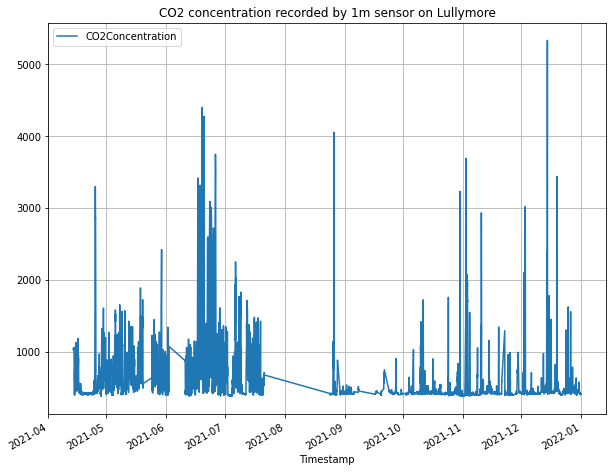

In [358]:
lm_1878.plot(x='Timestamp',y='CO2Concentration', kind='line', title='CO2 concentration recorded by 1m sensor on Lullymore')

plt.show()

In [359]:
lm_1878['month']=lm_1878['Timestamp'].dt.month
lm_1878['month']=lm_1878['month'].apply(lambda x:calendar.month_abbr[x])
lm_1878['day']=lm_1878['Timestamp'].dt.day

lm_1878['day_of_week']=lm_1878['Timestamp'].dt.dayofweek
lm_1878['day_of_week']=lm_1878['day_of_week'].apply(lambda x:calendar.day_abbr[x])

lm_1878['hour']=lm_1878['Timestamp'].dt.hour
lm_1878['time_of_day']=lm_1878['hour'].apply(lambda x: 'morning' if x<=11 else 'afternoon' if x<=15
                                                else 'evening' if x<=19 else 'night')
lm_1878.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF,month,day,day_of_week,hour,time_of_day
0,2021-04-14 01:20:40,46.951813,21.710187,21.38,103114,2.903,1031,1029,0,21.63,3.043,3.007,35923,35923,Apr,14,Wed,1,morning
1,2021-04-14 01:30:40,46.925110,21.659243,21.33,103112,2.903,1030,1029,0,21.57,3.043,3.007,35934,35927,Apr,14,Wed,1,morning
2,2021-04-14 01:40:39,46.923203,21.608298,21.28,103112,2.903,1038,1032,0,21.52,3.043,3.007,35915,35923,Apr,14,Wed,1,morning
3,2021-04-14 01:50:43,46.917480,21.551992,21.23,103116,2.904,1042,1035,0,21.47,3.043,3.007,35906,35918,Apr,14,Wed,1,morning
4,2021-04-14 02:00:39,46.917480,21.506410,21.18,103114,2.903,1028,1034,0,21.42,3.043,3.007,35955,35927,Apr,14,Wed,2,morning


(300.0, 2000.0)

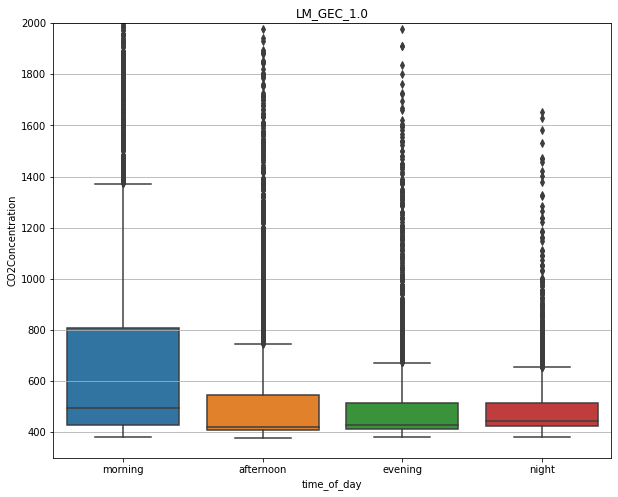

In [360]:
ax=sns.boxplot(x='time_of_day', y='CO2Concentration', data=lm_1878)
ax.set_title('LM_GEC_1.0')
ax.set_ylim(300,2000)

(300.0, 2000.0)

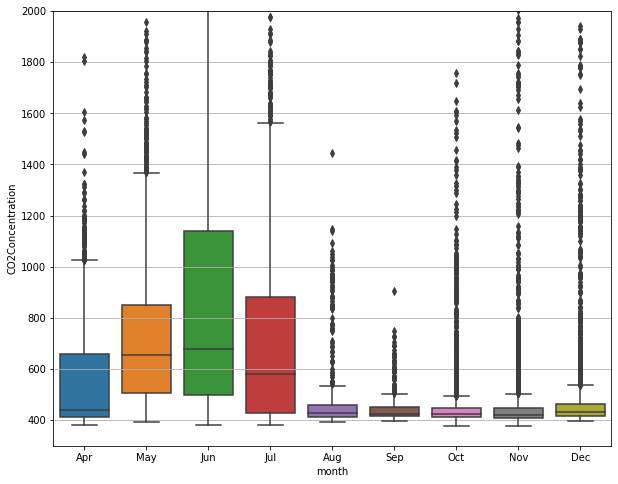

In [361]:
ax=sns.boxplot(x='month', y='CO2Concentration', data=lm_1878)
ax.set_ylim(300,2000)

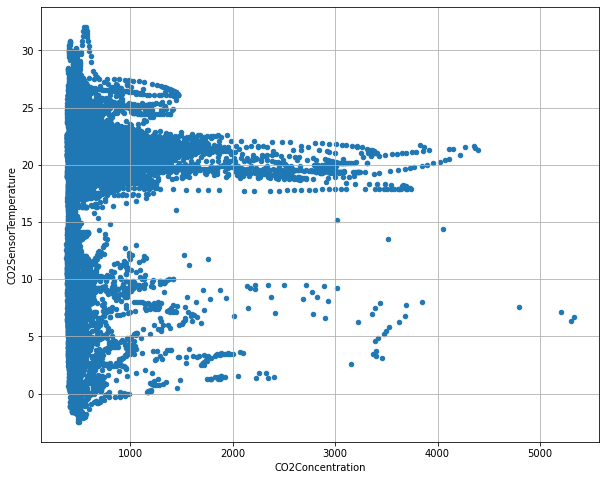

In [362]:
ax=lm_1878.plot(x='CO2Concentration', y='CO2SensorTemperature',kind='scatter')
plt.show()

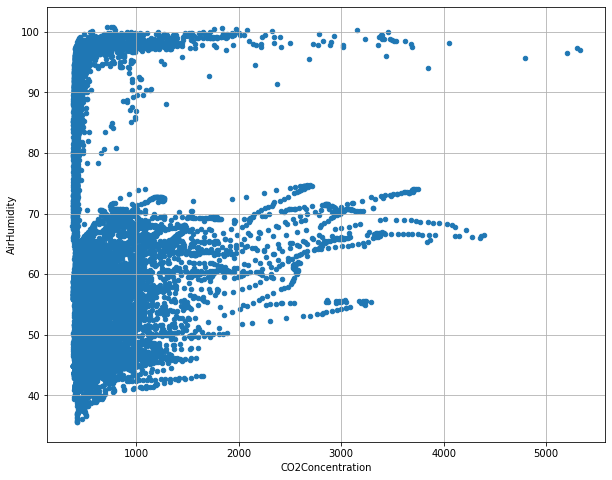

In [363]:
ax=lm_1878.plot(x='CO2Concentration', y='AirHumidity',kind='scatter')
plt.show()

Text(0.5, 0, 'AirHumidity')

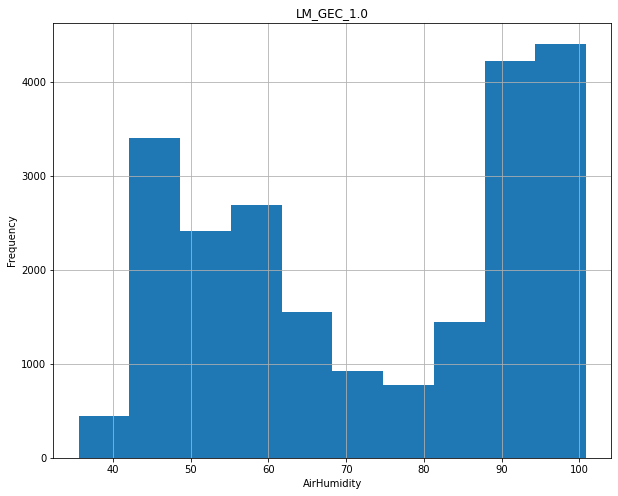

In [364]:
lm_1878['AirHumidity'].plot(kind='hist',title='LM_GEC_1.0')
plt.xlabel('AirHumidity')

In [365]:
df2=lm_1878[lm_1878.CO2Concentration >=1000]
df2.shape


(2126, 19)

In [366]:
df2['time_of_day'].value_counts()

morning      1689
afternoon     277
evening       126
night          34
Name: time_of_day, dtype: int64

In [367]:
s = pd.Series([1, 2, 3, 4, 5])
s.rolling(3).sum()

0     NaN
1     NaN
2     6.0
3     9.0
4    12.0
dtype: float64

# 1879

In [368]:
lm_1879=pd.read_csv('CO2_1879.csv', sep=';')

In [369]:
lm_1879['Timestamp']=pd.to_datetime(lm_1879.Timestamp, infer_datetime_format=True)
lm_1879.head()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF
0,2021-04-14 01:24:22,47.020477,21.560035,21.10,103086,2.965,1025,1012,0,21.38,3.029,2.992,36144,36180
1,2021-04-14 01:34:22,47.009033,21.517135,21.05,103082,2.965,1022,1013,0,21.33,3.029,2.992,36160,36176
2,2021-04-14 01:44:23,46.980423,21.479597,21.00,103086,2.966,1032,1015,0,21.29,3.029,2.992,36129,36172
3,2021-04-14 01:54:23,46.978516,21.431334,20.95,103086,2.965,1021,1017,0,21.24,3.029,2.992,36172,36166
4,2021-04-14 02:04:31,46.986145,21.385753,20.91,103084,2.965,1024,1017,0,21.20,3.029,2.992,36164,36168


In [370]:
lm_1879.describe()

,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF
count,15436.000000,15436.000000,15436.000000,15436.000000,15436.000000,15436.000000,15436.000000,15436.000000,15436.000000,15436.000000,15436.000000,15436.000000,15436.000000
mean,65.919568,17.791086,17.462920,100970.042498,2.904140,680.184180,680.293405,0.016585,17.585343,3.027814,2.988242,38148.812970,38147.290555
std,20.620372,6.229659,6.119077,1219.453974,0.076547,470.483213,469.876684,2.060500,6.228342,0.003243,0.005472,1838.075398,1836.518015
min,35.269302,-1.292466,-1.370000,95388.000000,2.739000,376.000000,380.000000,0.000000,-1.580000,2.650000,2.650000,29142.000000,29153.000000
25%,48.068565,14.003534,13.857500,100112.000000,2.838000,428.000000,428.000000,0.000000,13.697500,3.027000,2.985000,37314.750000,37317.750000
50%,58.983368,19.667056,19.220000,101264.000000,2.949000,495.000000,496.000000,0.000000,19.460000,3.028000,2.990000,38331.000000,38326.000000
75%,90.426964,21.795988,21.390000,101858.000000,2.957000,734.000000,734.000000,0.000000,21.620000,3.029000,2.991000,39642.000000,39642.000000
max,102.331680,33.660627,33.490000,103182.000000,2.966000,4309.000000,4307.000000,256.000000,33.420000,3.029000,2.996000,41019.000000,41003.000000


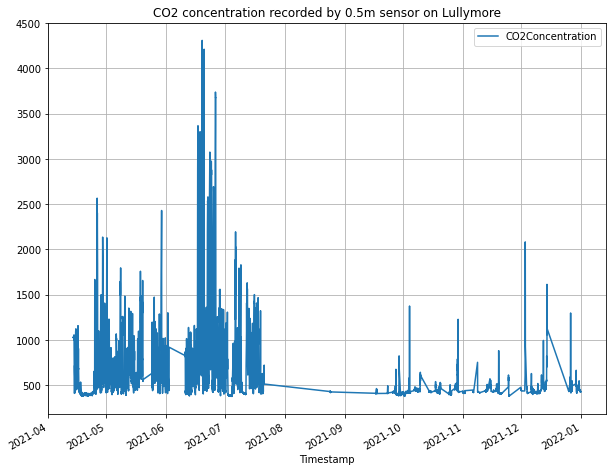

In [371]:
lm_1879.plot(x='Timestamp',y='CO2Concentration', kind='line', title='CO2 concentration recorded by 0.5m sensor on Lullymore')

plt.show()

In [236]:
lm_1879['month']=lm_1879['Timestamp'].dt.month
lm_1879['month']=lm_1879['month'].apply(lambda x:calendar.month_abbr[x])
lm_1879['day']=lm_1879['Timestamp'].dt.day

lm_1879['day_of_week']=lm_1879['Timestamp'].dt.dayofweek
lm_1879['day_of_week']=lm_1879['day_of_week'].apply(lambda x:calendar.day_abbr[x])

lm_1879['hour']=lm_1879['Timestamp'].dt.hour
lm_1879['time_of_day']=lm_1879['hour'].apply(lambda x: 'morning' if x<=11 else 'afternoon' if x<=15
                                                else 'evening' if x<=19 else 'night')
lm_1879.tail()

,Timestamp,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF,month,day,day_of_week,hour,time_of_day
15431,2021-12-31 15:12:18,91.503662,13.202503,13.10,100258,2.745,426,429,0,13.00,3.026,2.983,39844,39816,Dec,31,Fri,15,afternoon
15432,2021-12-31 15:22:18,92.068237,13.151559,13.04,100268,2.745,426,429,0,12.95,3.026,2.983,39849,39820,Dec,31,Fri,15,afternoon
15433,2021-12-31 15:32:18,92.594666,13.071121,12.97,100266,2.745,433,429,0,12.88,3.026,2.983,39819,39823,Dec,31,Fri,15,afternoon
15434,2021-12-31 15:42:19,92.976135,12.979957,12.89,100264,2.745,428,429,0,12.79,3.026,2.983,39852,39824,Dec,31,Fri,15,afternoon
15435,2021-12-31 15:52:19,93.340439,12.899519,12.81,100286,2.745,433,429,0,12.71,3.026,2.983,39832,39827,Dec,31,Fri,15,afternoon


(300.0, 2000.0)

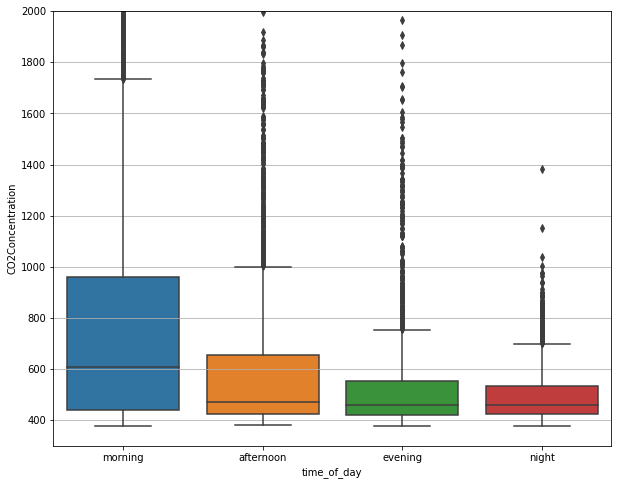

In [237]:
ax=sns.boxplot(x='time_of_day', y='CO2Concentration', data=lm_1879)
ax.set_ylim(300,2000)

(300.0, 2000.0)

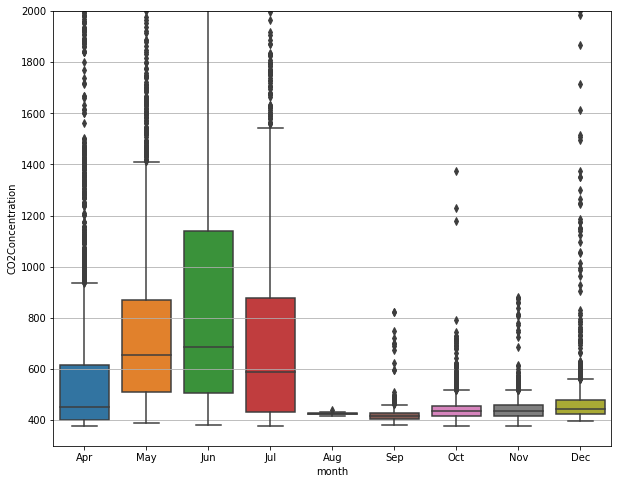

In [238]:
ax=sns.boxplot(x='month', y='CO2Concentration', data=lm_1879)
ax.set_ylim(300,2000)

In [239]:
df2=lm_1879[lm_1879.CO2Concentration >=1000]
df2.shape

(2062, 19)

In [240]:
df2['time_of_day'].value_counts()

morning      1719
afternoon     250
evening        89
night           4
Name: time_of_day, dtype: int64

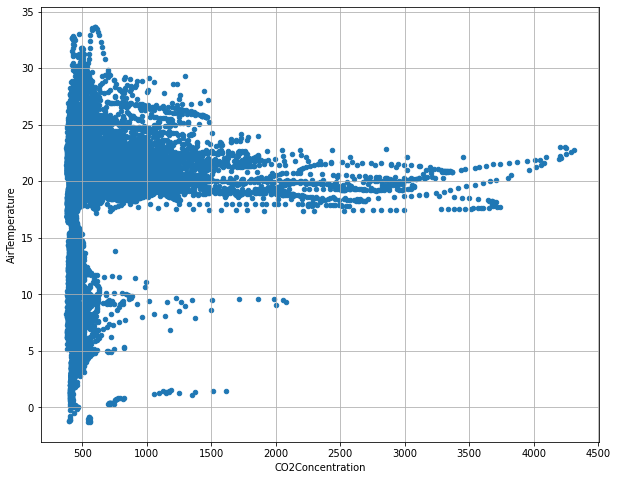

In [241]:
ax=lm_1879.plot(x='CO2Concentration', y='AirTemperature',kind='scatter')
plt.show()

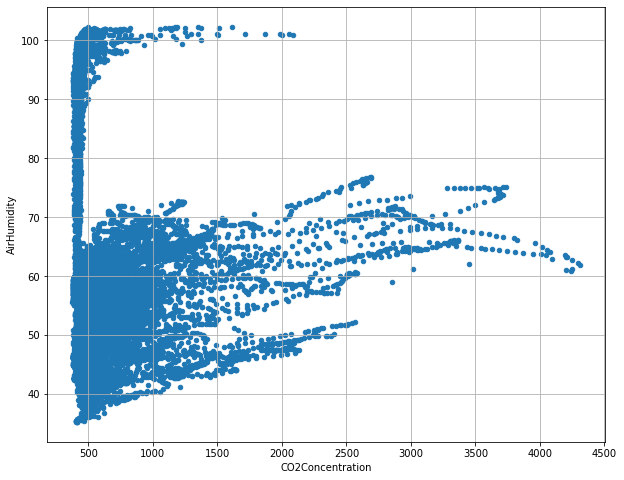

In [242]:
ax=lm_1879.plot(x='CO2Concentration', y='AirHumidity',kind='scatter')
plt.show()

Text(0.5, 0, 'AirHumidity')

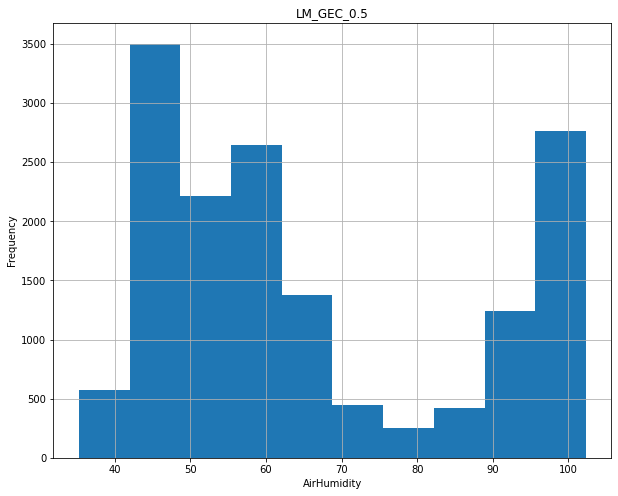

In [243]:
lm_1879['AirHumidity'].plot(kind='hist',title='LM_GEC_0.5')
plt.xlabel('AirHumidity')

# Outlier Detection

In [244]:
cl_c_1824.columns
cl_c_1824.fillna(0,inplace=True)
#specify the 12 metrics column names to be modelled
to_model_columns=cl_c_1824.columns[1:5]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(cl_c_1824[to_model_columns])
pred = clf.predict(cl_c_1824[to_model_columns])
cl_c_1824['anomaly']=pred
outliers=cl_c_1824.loc[cl_c_1824['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(cl_c_1824['anomaly'].value_counts())

 1    25546
-1     1272
Name: anomaly, dtype: int64


IndexError: index 13539 is out of bounds for axis 0 with size 13539

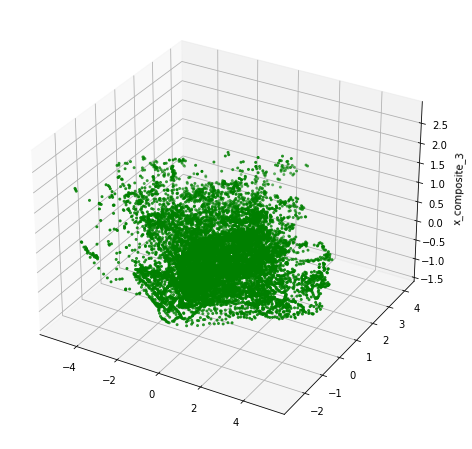

In [245]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(cl_ec_1826[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(2)
pca.fit(cl_ec_1826[to_model_columns])
res=pd.DataFrame(pca.transform(cl_ec_1826[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

# DBSACN

In [248]:
dbscan_data=cl_c_1824[['CO2Concentration']]

dbscan_data=dbscan_data.values.astype('float32', copy=False)
#dbscan_data
cl_c_1824.shape

(26818, 18)

In [249]:
dbscan_data_scaler=StandardScaler().fit(dbscan_data)
dbscan_data=dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[-0.00691227],
       [ 0.01537399],
       [-0.28090218],
       ...,
       [-0.19569   ],
       [-0.19175714],
       [-0.19044618]], dtype=float32)

In [271]:
#construct model
from sklearn.cluster import DBSCAN
clusters=DBSCAN(eps=0.1, min_samples=15, metric='euclidean').fit(dbscan_data)
#get clusters label
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [272]:
#check unique clusters
set(clusters.labels_)

{-1, 0, 1, 2, 3, 4, 5}

In [273]:
from collections import Counter
#get each cluster size
Counter(clusters.labels_)

Counter({0: 26394, 1: 219, 5: 19, 2: 70, -1: 79, 4: 16, 3: 21})

AttributeError: module 'seaborn' has no attribute 'move_legend'

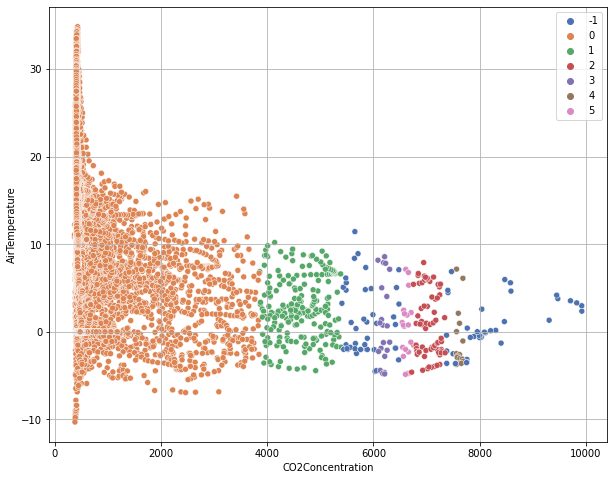

In [274]:
p = sns.scatterplot(data=cl_c_1824,x= cl_c_1824['CO2Concentration'], y=cl_c_1824['AirTemperature'], hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p,"upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
#plt.legend(clusters.labels_, loc='upper right')
plt.title('cl_c_1824')
plt.show()


In [128]:
#separate outliers from clustered data
outliers_df=cl_c_1825[model.labels_==-1]
clusters_df=cl_c_1825[model.labels_ !=-1]
outliers_df.shape

(160, 19)

In [129]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [130]:
colors=model.labels_
colors_clusters=colors[colors !=-1]
color_outliers='red'

In [131]:
from collections import Counter
clusters=Counter(model.labels_)
print(clusters)
print(cl_c_1825[model.labels_==-1][:5])
print(f"Number of clusters{len(clusters)}")

Counter({0: 19243, -1: 160, 1: 31, 2: 21, 3: 16})
             Timestamp  AirHumidity  AirTemperature  BarometerTemperature  \
25 2021-01-12 06:28:49   100.483459        8.880289                  8.64   
30 2021-01-12 21:08:48   100.849670        5.298106                  5.02   
32 2021-01-13 05:18:47   100.678009        9.483575                  9.21   
68 2021-01-17 11:18:50   100.990814        3.086055                  2.78   
75 2021-01-21 11:28:47   101.133865        6.196333                  5.91   

    BarometricPressure BatteryVoltage  CO2Concentration  CO2ConcentrationLPF  \
25              100836            NaN              1723                 1742   
30              101446            NaN              1417                 1397   
32              101282            NaN              2004                 2016   
68              102364            NaN              1322                 1298   
75               98020            NaN              1189                  972   

    CO

AttributeError: 'dict' object has no attribute 'keys_'

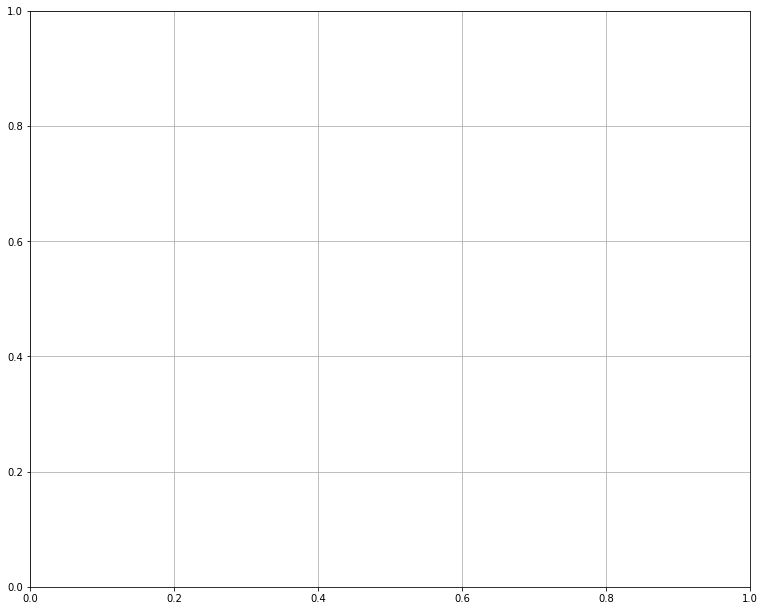

In [140]:
#plot clusters and outliers
colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow'}
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
ax.scatter(clusters_df['Timestamp'], clusters_df['CO2Concentration'], c=colors.keys, edgecolor='blue', s=50)
ax.legend(clusters)


In [133]:
clusters

Counter({0: 19243, -1: 160, 1: 31, 2: 21, 3: 16})

In [ ]:
clusters.keys()


In [ ]:
X=cl_c_1825[['Timestamp','CO2Concentration']]
X

In [ ]:
df = pd.DataFrame(dict(x=X[0], y=X[1:]))

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='Timestamp', y='CO2Concentration')
plt.xlabel('Date/Time')
plt.ylabel('CO2 Concentration')
plt.show()

In [ ]:

from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.5, min_samples = 20).fit(X)
cluster = clustering.labels_

In [ ]:
len(set(cluster))

In [ ]:
def show_clusters(X, cluster):
  df = pd.DataFrame(dict(x=cl_c_1824['Timestamp'], y=cl_c_1824['CO2Concentration'], label=cluster))
  colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x=cl_c_1824['Timestamp'], y=cl_c_1824['CO2Concentration'], label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()

In [ ]:
show_clusters(X, cluster)